# Emotion Analysis

This notebook analyzes the level of anger, fear and sadness present in the open-ended survey comments. The comments can be viewed individually or grouped into themes, sub-themes and agreement levels. 

### Method

The idea behind this method is that words are associated to an emotion. To determine the emotion of a comment the words within the comment were compared to the [NRC Affect Intensity Lexicon v0.5](http://saifmohammad.com/WebDocs/NRC-AffectIntensity-Lexicon.txt) (Saif M. Mohammad). The lexicon contains 6,000 words associated with anger, fear, sadness and joy. Each word has a score from 0 to 1 where the higher the scores indicates the word is more strongly associated with that emotion. To get each emotion the words were summed up to give an emotion score for the comment, to determine the main emotion present the emotion with the highest score was chosen. 
 
The lexicon does contain joy as an emotion but joy was left out of this analysis since the comments
are assumed to be negative and we were trying to understand what are the underlying causes of the employee’s negative sentiment. Joy was included at first but removed as it was found to be the prevailing emotion. Through investigating the results, we found that joy was not the correct label for the comment because the words associated are common words but were being used with a negative connotation like "not good". 

The rules of the matcher only count if the word is present and does not understand the context of the word. When examples of anger, fear and sadness were looked at the words were being used in the appropriate manner for this analysis. 

There is a function written to normalize the scores the scores to make it easier to compare comments emotion scores. This can be chosen as a parameter in some of the exploring functions. It works by dividing the comments by their length but does not function optimally and is not recommended to use. This is an area that improvement could be done on. 

### Instructions for use

This notebook can be used to look at different emotions, comments, subthemes and themes. Change the parameters of the functions to look at different examples. The functions can work with the desensitized qualitative data as well as the linking_joined_qual_quant if you want to examine the different agreement levels. The functions are well documented, the notebook below shows examples of their use. 

The main flow for the notebook:
- load dataset
    - densensitized needs to be processed first with `pre_process_comments`
    - linking agreement is the correct format to start
- parse through comments to get the emotions scores with `obtain_emotion_scores`
- explore the data with the visualization and exploring functions
    - plot_emotions
    - display_top_emotions
    - examine_emotion_scoring
    - summary


### Info about working directories

This notebook had been set up to run from the root directory. To switch the working directory, follow the instructions in the cell below.



In [1]:
# This code chunck will change the working directory to be project root (only run once)

import os
# check what folder is the current working directory
print("Intial Working Directory \n", os.getcwd())
# change the working directory to one level up
os.chdir('../')
# confirm working directory is now project root
print("Current Working Directory \n", os.getcwd())

Intial Working Directory 
 C:\Users\payla\Documents\MDS\Capstone\DSCI_591_capstone-BCStats\notebooks
Current Working Directory 
 C:\Users\payla\Documents\MDS\Capstone\DSCI_591_capstone-BCStats


In [2]:
# Required packages
import pandas as pd
import time
import src
from src.analysis.emotion_analysis import *

## Load Data and Lexicon

In [3]:
# read full data
data_full = pd.read_csv(".\data\interim\desensitized_qualitative-data2018.csv",
                            usecols=[0, 1, 2, 3, 4, 5, 6], 
                            names=["USERID", "text", "code1", "code2", "code3", "code4", "code5"], skiprows=1)

# load lexicon
lexicon = pd.read_csv("http://saifmohammad.com/WebDocs/NRC-AffectIntensity-Lexicon.txt", 
                      sep="\t", 
                      skiprows=35) 
# read in data legend
legend = pd.read_csv("./references/data-dictionaries/theme_subtheme_names.csv")

## Process Full Comment data and Add Themes Names

In [4]:
data_full = src.analysis.emotion_analysis.pre_process_comments(data_full, legend)

## Obtain Emotion Scores for Each Comment

In [5]:
start = time.time()
full_scores = src.analysis.emotion_analysis.obtain_emotion_scores(data_full, 
                                                                  lexicon, 
                                                                  anger=True, 
                                                                  fear=True, 
                                                                  sadness=True, 
                                                                  joy=False)
end = time.time()
print((end - start) / 60, "mins")

12.010061911741893 mins


### Overall Emotions

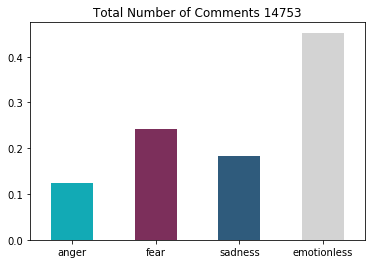

In [6]:
#df = full_scores
src.analysis.emotion_analysis.plot_emotions(full_scores)

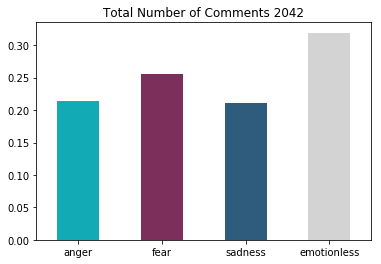

In [7]:
src.analysis.emotion_analysis.plot_emotions(full_scores, depth="theme", name="Supervisors")

In [8]:
top_fear = src.analysis.emotion_analysis.display_top_emotions(full_scores, "fear", 5)
top_fear

,code,text,theme,subtheme_description,anger,fear,sad
10000,83,to not be afraid to truly blend with the staff...,Supervisors,Strengthen quality of supervisory leadership,4.366,6.610,2.548
9778,101,staffing levels. there is far too much violenc...,"Tools, Equipment & Physical Environment",Ensure safety and security of employees,4.054,6.573,5.534
12468,113,the trauma informed model does not work as a m...,"Vision, Mission & Goals",Improve program and/or policy implementation,1.836,6.327,1.031
14115,113,we have gotten to a point where the rights of ...,"Vision, Mission & Goals",Improve program and/or policy implementation,1.560,5.917,2.365
4610,94,as being part of a ministry that has a high le...,Stress & Workload,Support a healthy workplace,1.621,5.743,4.458


In [9]:
src.analysis.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, )

,code,theme,subtheme_description,anger,fear,sad,_anger,_fear,_sad
23385,93,Stress & Workload,Review workload expectations,0.823,1.047,0.758,0,1,0




Comment
-------
leadership under the exist psa model for senior executive focuses too much on the political rather than the public service, the downside for staff is they have no impact on decisions affecting them, and often receive very little credit because  they report to executive who are more focussed on their upward mobility.   workloads are far too uneven in many branches, staff receive little to no training or follow up on how to their jobs correctly.   the management compensation framework was a disaster, the dm in charge should have been removed, too many favours were given out.   why it is most senior jobs are filled without competition due to a 'business purposes' need.


ANGER
-----
management 0.102
disaster 0.721


FEAR
-----
disaster 0.875
competition 0.172


SAD
-----
disaster 0.758




In [10]:
src.analysis.emotion_analysis.display_top_emotions(full_scores, "fear", 5, normalize=True)

,code,text,theme,subtheme_description,anger,fear,sad
13444,13,trauma based training,Career & Personal Development,Improve training and development opportunities,0.00,27.600,0.00
9125,101,safety/security as my workplace has become mor...,"Tools, Equipment & Physical Environment",Ensure safety and security of employees,8.44,15.620,0.00
10780,93,stress and workload,Stress & Workload,Review workload expectations,0.00,14.633,0.00
5710,95,stress level management,Stress & Workload,Stress & workload - other,3.40,14.633,0.00
11532,93,deal with crushing work load.,Stress & Workload,Review workload expectations,14.70,13.440,12.18


In [11]:
src.analysis.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, 13444)

,code,theme,subtheme_description,anger,fear,sad,_anger,_fear,_sad
13444,13,Career & Personal Development,Improve training and development opportunities,0,0.828,0,0,1,0




Comment
-------
trauma based training 


ANGER
-----


FEAR
-----
trauma 0.828


SAD
-----




In [12]:
src.analysis.emotion_analysis.summary(full_scores)

,Total Number of:,Count
0,Rows,24468
1,Unique Comments,14753
2,Emotionless Comments,9259
3,Comments with any Anger,9071
4,Comments with max Anger,1827
5,Comments with any Fear,11403
6,Comments with max Fear,3557
7,Comments with any Sadness,9837
8,Comments with max Sadness,2694


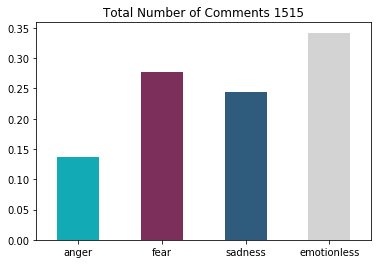

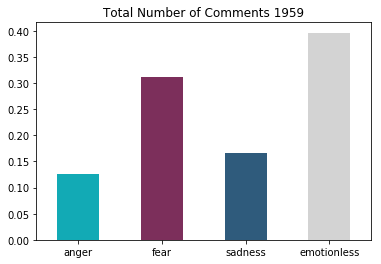

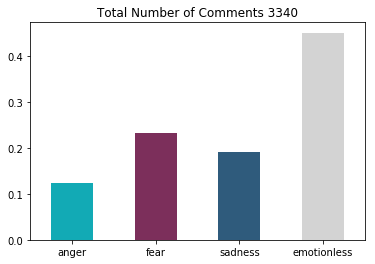

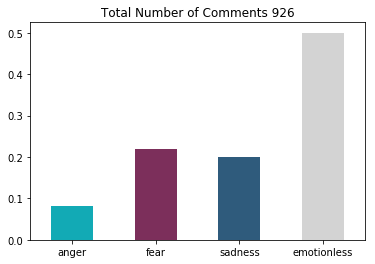

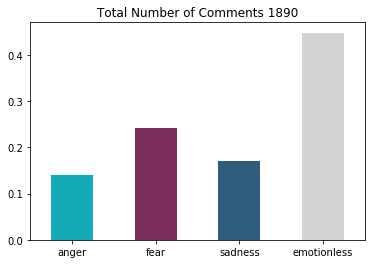

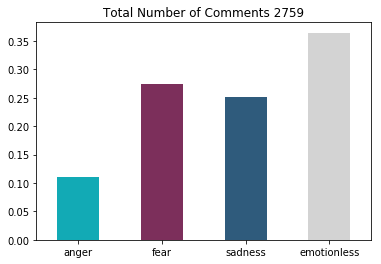

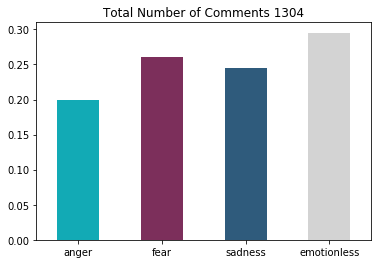

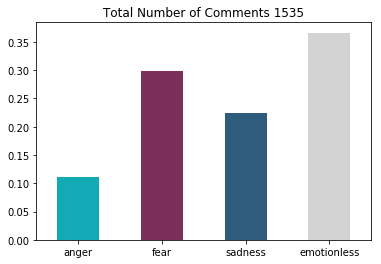

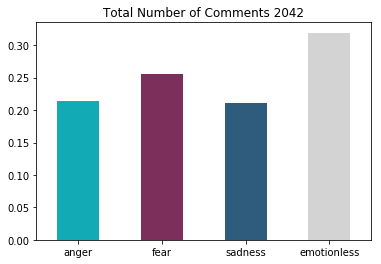

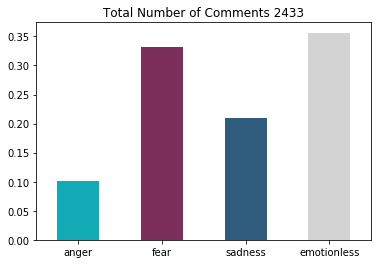

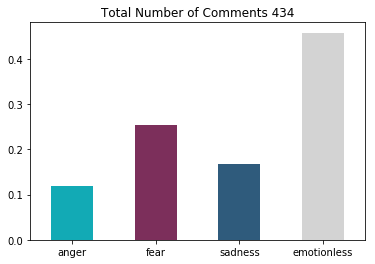

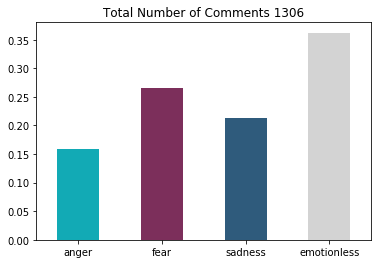

In [22]:
# to view all the different themes
full_scores1 = full_scores.dropna(subset=["theme"])

themes = full_scores1["theme"].unique()

for theme in themes:
    src.analysis.emotion_analysis.plot_emotions(data=full_scores1, 
                                                      depth="theme", 
                                                      name=theme)